In [1]:
%%time
import malaya

CPU times: user 12 s, sys: 1.41 s, total: 13.4 s
Wall time: 17.1 s


In [2]:
anger_text = 'aku cukup tak suka budak gemuk tu'
fear_text = 'saya takut dengan hantu'
joy_text = 'gembiranya hari ni, dapat jumpa crush'
love_text = 'saya terlalu cintakan dia'
sadness_text = 'kawan rapat aku putuskan hubungan'
surprise_text = 'terharu aku harini, semua orang cakap selamat hari jadi'

All models got `get_proba` parameters.
If True, it will returned probability every classes. Else, it will return highest probability class. **Default is True.**

## Load multinomial model

In [3]:
model = malaya.emotion.multinomial()
print(model.predict(anger_text))
print(model.predict(anger_text,get_proba=True))
model.predict_batch([anger_text,
                    fear_text,
                    joy_text,
                    love_text,
                    sadness_text,
                    surprise_text])

anger
{'anger': 0.30367763926253094, 'fear': 0.16709964152193366, 'joy': 0.17026521921403184, 'love': 0.18405977732934192, 'sadness': 0.1388341895665479, 'surprise': 0.03606353310561458}


['anger', 'fear', 'joy', 'joy', 'sadness', 'fear']

## Load xgb model

In [4]:
model = malaya.emotion.xgb()
print(model.predict(anger_text))
print(model.predict(anger_text,get_proba=True))
model.predict_batch([anger_text,
                    fear_text,
                    joy_text,
                    love_text,
                    sadness_text,
                    surprise_text],get_proba=True)

love
{'anger': 0.22918181, 'fear': 0.089252785, 'joy': 0.1318236, 'love': 0.46476611, 'sadness': 0.07200217, 'surprise': 0.012973559}


[{'anger': 0.22918181,
  'fear': 0.089252785,
  'joy': 0.1318236,
  'love': 0.46476611,
  'sadness': 0.07200217,
  'surprise': 0.012973559},
 {'anger': 0.013483193,
  'fear': 0.939588,
  'joy': 0.01674833,
  'love': 0.003220023,
  'sadness': 0.022906518,
  'surprise': 0.0040539484},
 {'anger': 0.10506946,
  'fear': 0.025150253,
  'joy': 0.725915,
  'love': 0.05211037,
  'sadness': 0.078554265,
  'surprise': 0.013200594},
 {'anger': 0.11640434,
  'fear': 0.097485565,
  'joy': 0.24893147,
  'love': 0.25440857,
  'sadness': 0.2650988,
  'surprise': 0.01767122},
 {'anger': 0.27124837,
  'fear': 0.15662362,
  'joy': 0.131251,
  'love': 0.022184724,
  'sadness': 0.41255626,
  'surprise': 0.006135965},
 {'anger': 0.07513438,
  'fear': 0.2525073,
  'joy': 0.024355419,
  'love': 0.002638406,
  'sadness': 0.0059716892,
  'surprise': 0.6393928}]

## List available deep learning models

In [5]:
malaya.emotion.available_deep_model()

['fast-text',
 'hierarchical',
 'bahdanau',
 'luong',
 'bidirectional',
 'bert',
 'entity-network']

In [6]:
for i in malaya.emotion.available_deep_model():
    print('Testing %s model'%(i))
    model = malaya.emotion.deep_model(i)
    print(model.predict(anger_text))
    print(model.predict_batch([anger_text,
                    fear_text,
                    joy_text,
                    love_text,
                    sadness_text,
                    surprise_text]))
    print(model.predict_batch([anger_text,
                    fear_text,
                    joy_text,
                    love_text,
                    sadness_text,
                    surprise_text], get_proba = True))
    print()

Testing fast-text model
love
['love', 'fear', 'joy', 'love', 'sadness', 'surprise']
[{'anger': 2.538603e-07, 'fear': 4.1372344e-13, 'joy': 1.0892472e-08, 'love': 0.99999976, 'sadness': 3.8994935e-16, 'surprise': 2.439655e-08}, {'anger': 4.4489467e-24, 'fear': 1.0, 'joy': 1.3903143e-28, 'love': 1.7920514e-33, 'sadness': 1.01771616e-26, 'surprise': 6.799581e-18}, {'anger': 9.583714e-26, 'fear': 1.5029816e-24, 'joy': 1.0, 'love': 3.7527533e-13, 'sadness': 8.348174e-24, 'surprise': 2.080897e-16}, {'anger': 1.7409228e-13, 'fear': 3.2279754e-12, 'joy': 0.0005876841, 'love': 0.9994123, 'sadness': 1.8902605e-11, 'surprise': 9.9256076e-11}, {'anger': 1.2737708e-11, 'fear': 5.882562e-10, 'joy': 9.112171e-13, 'love': 7.7659496e-20, 'sadness': 1.0, 'surprise': 1.6035637e-16}, {'anger': 5.5730725e-37, 'fear': 0.16033638, 'joy': 1.2999706e-30, 'love': 0.0, 'sadness': 0.0, 'surprise': 0.8396636}]

Testing hierarchical model
anger
['anger', 'fear', 'joy', 'joy', 'sadness', 'joy']
[{'anger': 0.22394963

## Unsupervised important words learning

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # i just really like seaborn colors

We need to set `get_proba` become True to get the 'attention'.

#### Visualizing bahdanau model

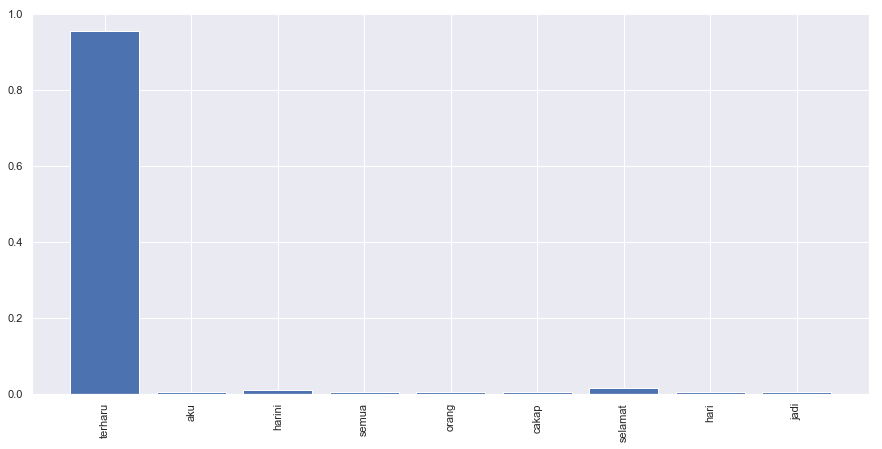

In [8]:
model = malaya.emotion.deep_model('bahdanau')
result = model.predict(surprise_text, get_proba = True)['attention']

plt.figure(figsize = (15, 7))
labels = [r[0] for r in result]
val = [r[1] for r in result]
aranged = [i for i in range(len(labels))]
plt.bar(aranged, val)
plt.xticks(aranged, labels, rotation = 'vertical')
plt.show()

#### Visualizing luong model

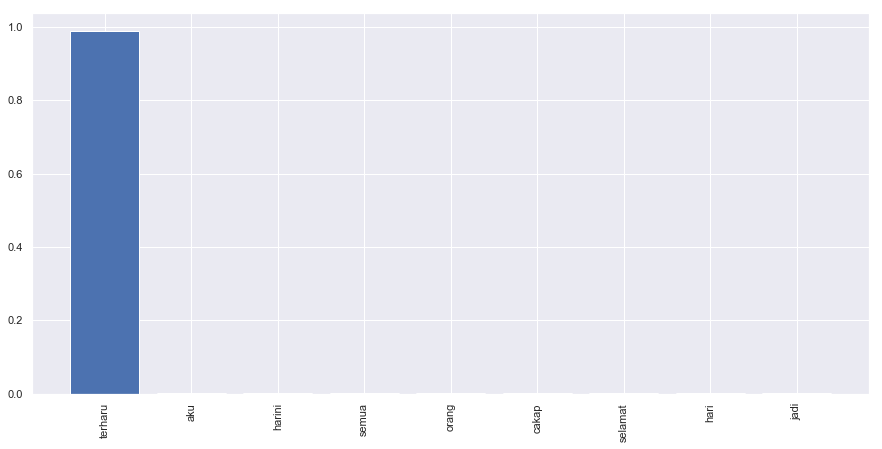

In [9]:
model = malaya.emotion.deep_model('luong')
result = model.predict(surprise_text, get_proba = True)['attention']

plt.figure(figsize = (15, 7))
labels = [r[0] for r in result]
val = [r[1] for r in result]
aranged = [i for i in range(len(labels))]
plt.bar(aranged, val)
plt.xticks(aranged, labels, rotation = 'vertical')
plt.show()

#### Visualizing hierarchical model

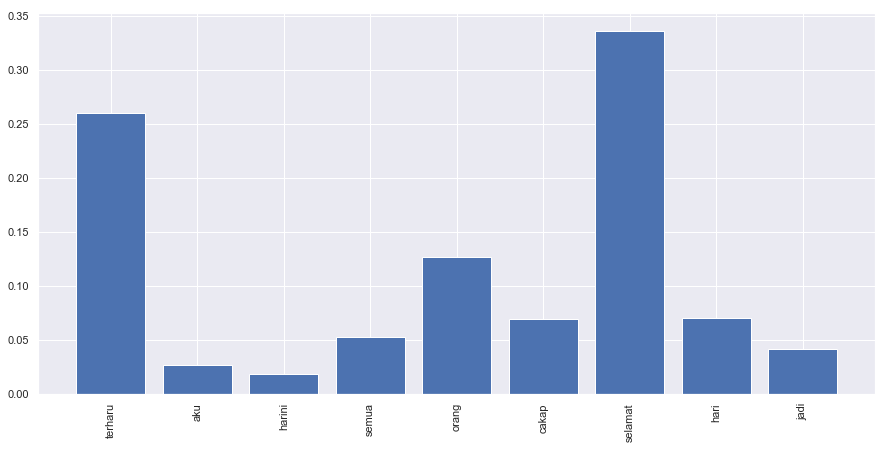

In [10]:
model = malaya.emotion.deep_model('hierarchical')
result = model.predict(surprise_text, get_proba=True)['attention']

plt.figure(figsize = (15, 7))
labels = [r[0] for r in result]
val = [r[1] for r in result]
aranged = [i for i in range(len(labels))]
plt.bar(aranged, val)
plt.xticks(aranged, labels, rotation = 'vertical')
plt.show()

## Load Sparse deep learning models

What happen if a word not included in the dictionary of the models? like `setan`, what if `setan` appeared in text we want to classify? We found this problem when classifying social media texts / posts. Words used not really a vocabulary-based contextual.

Malaya will treat **unknown words** as `<UNK>`, so, to solve this problem, we need to use N-grams character based. Malaya chose tri-grams until fifth-grams.

```python
setan = ['set', 'eta', 'tan']
```

Sklearn provided easy interface to use n-grams, problem is, it is very sparse, a lot of zeros and not memory efficient. Sklearn returned sparse matrix for the result, lucky Tensorflow already provided some sparse function.

In [11]:
malaya.emotion.available_sparse_deep_model()

['fast-text-char']

Right now Malaya only provide 1 sparse model, `fast-text-char`. We will try to evolve it.

In [12]:
sparse_model = malaya.emotion.sparse_deep_model()

INFO:tensorflow:Restoring parameters from /Users/huseinzol/Malaya/emotion/fast-text-char/model.ckpt


In [13]:
sparse_model.predict(sadness_text)

'sadness'

In [14]:
sparse_model.predict_batch([anger_text,
                    fear_text,
                    joy_text,
                    love_text,
                    sadness_text,
                    surprise_text])

['love', 'fear', 'joy', 'love', 'sadness', 'fear']

In [15]:
sparse_model.predict_batch([anger_text,
                    fear_text,
                    joy_text,
                    love_text,
                    sadness_text,
                    surprise_text], get_proba = True)

[{'anger': 0.07479232,
  'fear': 0.012134718,
  'joy': 0.034137156,
  'love': 0.85221285,
  'sadness': 0.006336733,
  'surprise': 0.020386234},
 {'anger': 1.6892743e-08,
  'fear': 0.99999964,
  'joy': 6.260633e-08,
  'love': 3.2111713e-10,
  'sadness': 3.542872e-08,
  'surprise': 2.2207877e-07},
 {'anger': 0.00012469916,
  'fear': 9.6892345e-06,
  'joy': 0.9917463,
  'love': 0.006561422,
  'sadness': 0.00040069615,
  'surprise': 0.0011572224},
 {'anger': 5.0021445e-05,
  'fear': 0.0010109642,
  'joy': 0.049688663,
  'love': 0.94577587,
  'sadness': 0.0032941191,
  'surprise': 0.00018034693},
 {'anger': 0.0010146926,
  'fear': 0.00020020001,
  'joy': 5.2909185e-05,
  'love': 2.640257e-06,
  'sadness': 0.99870074,
  'surprise': 2.8823646e-05},
 {'anger': 0.0057854424,
  'fear': 0.8317998,
  'joy': 0.017287944,
  'love': 0.008883897,
  'sadness': 0.0070799366,
  'surprise': 0.12916291}]